# Network for project assignment: Coachella Artist Analysis 

In [132]:
import pandas as pd
import networkx as nx 

import netwulf as nw 
import matplotlib.pyplot as plt 
import numpy as np

## **Section 1: Motivation**

#### **Dataset**
We have created two datasets for our analysis: **1. Artist Data**, **2. Song Data**.

**1. Artist Data**
This dataset contains all of the artists that have performed at Coachella, from 1999 to 2023, which stage they performed on and information about each artist (id, music genre, followers, popularity level). We retrieved this information by scraping the Wikipedia page: “Coachella Festival Line-Ups,” and by using the Spotify API.

**2. Song Data**
This dataset contains lyric data. From Artist Data, we retrieved all the artists that performed on the main stage (the most famous stage), and used the Musix Match API to retrieve each artist’s top 5 most popular song lyrics. The dataset includes each song ID, song name, and the first 30% of each song’s lyrics. 

#### **Why These Datasets?**
We chose these datasets for a few reasons, mainly that they contain the necessary data that aligns with the goal for our analysis. We are analyzing data from Coachella since its first year in 1999 and the Wikipedia page contains all of the Coachella information needed. Combining the Coachella data with artist data from the Spotify API, we created a completed data set (for our analysis). Furthermore, we know that both our datasets contain accurate data, as it was retrieved from reliable sources, such as Wikipedia, Spotify and MusixMatch. Both datasets are also of desirable size, allowing us to conduct a thorough analysis. Lastly, the data we retrieved was accessible and available for use, another important aspect of a dataset. 

#### **Goal for End User**
Our goal was to provide a cohesive analysis of performing artists at the annual Coachella music festival. In our network analysis, we aimed to illustrate artists that performed several times and whether they gained popularity over the years. The goal of our text analysis was to analyze the most popular words that reoccur in specific artists songs. For this, we focused on the artists that performed on the main Coachella stage, over the 25 years of Coachella data. Overall, the combination of our network and text analysis provides an overall picture of the Coachella lineups for the past 25 years, and >??, …

In [133]:
# Import data  

artist_data = pd.read_csv("data/coachella_artists.csv")
song_data = pd.read_csv("data/song_dataset_2.csv")

# Data set with genres 
artist_data = pd.read_csv("data/coachella_artists_full.csv")
artist_data

,Unnamed: 0,name,id,stage,year,genres,followers,popularity
0,0,Beck,4obzFoKoKRHIphyHzJ35G3,Main Stage,1999,"['latin pop', 'latin viral pop', 'rap latina',...","{'href': None, 'total': 14417880}",75
1,1,Beck,4obzFoKoKRHIphyHzJ35G3,Gobi Tent,2004,"['latin pop', 'latin viral pop', 'rap latina',...","{'href': None, 'total': 14417880}",75
2,2,Beck,4obzFoKoKRHIphyHzJ35G3,Coachella Stage,2014,"['latin pop', 'latin viral pop', 'rap latina',...","{'href': None, 'total': 14417880}",75
3,3,The Chemical Brothers,1GhPHrq36VKCY3ucVaZCfo,Main Stage,1999,"['alternative dance', 'big beat', 'breakbeat',...","{'href': None, 'total': 2041904}",58
4,4,The Chemical Brothers,1GhPHrq36VKCY3ucVaZCfo,Insomniac Tent,2001,"['alternative dance', 'big beat', 'breakbeat',...","{'href': None, 'total': 2041904}",58
...,...,...,...,...,...,...,...,...
2907,2907,Cassian,1ChtRJ3f4rbv4vtz87i6CD,Yuma Tent,2023,['melodic house'],"{'href': None, 'total': 53607}",50
2908,2908,TSHA,2kLa7JZu4Ijdz1Gle2khZh,Yuma Tent,2023,['uk house'],"{'href': None, 'total': 70743}",46
2909,2909,LP Giobbi,3oKnyRhYWzNsTiss5n4Z1J,Yuma Tent,2023,['house'],"{'href': None, 'total': 72986}",58
2910,2910,Airrica,57sPl5iWgq5t6AscVbMTOW,Yuma Tent,2023,[],"{'href': None, 'total': 853}",10


## **Section 2: Basic Stats**

#### **Data Cleaning & Preprocessing**
The **Artist Dataset** did not need any cleaning or preprocessing. It was important that we did not clean our dataset to get rid of duplicates, because one of the main aspects of our analysis was seeing if artists performed multiple times, and seeing which stage they returned to perform on.

The **Song Dataset** needed some cleaning up. ELLABORATE HERE .... 


#### **Dataset Stats**
The artist dataset contains 2912 rows of artists, XXXX megabytes, and has 8 variables. 

The song dataset contains 1300 rows of song lyrics, XXX megabytes, and has XX variables. 

!!!!! ((Add 1 or 2 more lines about the stats))

In [157]:

from tqdm import tqdm

""" Functions from exercises week 6 - creating graphs with authors and adding attibutes. """ 

def add_attributes(graph : nx.Graph, df : pd.DataFrame): 
    for node in tqdm(graph.nodes, desc="Adding atrributes"): 
        attributes = df[df["name"] == node]
        graph.add_node(node, year=attributes["year"].values)
        graph.add_node(node, stage=attributes["stage"].values)
        graph.add_node(node, genre=attributes["genres"].values)



In [156]:
""" Create a network of artists, with a link between them if they performed at the same stage, at the same year. """

from tqdm import tqdm

def create_graph(dataset):
    artists_graph = nx.Graph()
    
    grouped_data = dataset.groupby(["year", "stage"])
    
    for (year, stage), group in tqdm(grouped_data, desc="Creating graph"):
        artists_on_stage = set(group["name"])
        artists_graph.add_nodes_from(artists_on_stage)
        
        # Add links
        for artist1 in artists_on_stage:
            for artist2 in artists_on_stage:
                if artist1 != artist2:
                    artists_graph.add_edge(artist1, artist2, year=year, stage=stage)
    
    return artists_graph




In [158]:
artists_graph = create_graph(artist_data)
add_attributes(artists_graph, artist_data)


Creating graph:   0%|          | 0/124 [00:00<?, ?it/s]

Adding atrributes: 100%|██████████| 2240/2240 [00:01<00:00, 1252.34it/s]


In [159]:
# Check that there are no duplicate artists in the graph 

if len(set(artists_graph.nodes())) == len(artists_graph.nodes()): 
    print("No duplicates found in artist graph")

else: 
    print("Duplicates found")

No duplicates found in artist graph


In [138]:
# Visualize graph 

positions, b = nw.visualize(artists_graph)

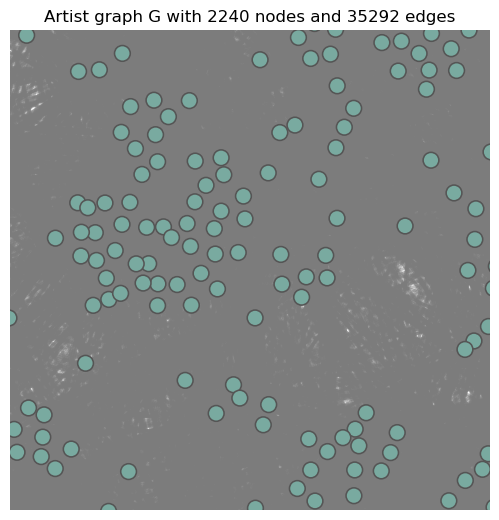

In [160]:
n, m = artists_graph.number_of_nodes(), artists_graph.number_of_edges()
fig, ax = nw.draw_netwulf(positions)
plt.title(f"Artist graph G with {n} nodes and {m} edges")
plt.show()

In [161]:
""" Graph and data analysis"""

# Find artists that performed more than n, and find top N artists

def find_duplicate_artists(df, n, N): 
    count = df.groupby("name").size()
    duplicates = count[count > n]
    print(f"{len(duplicates)} artists performed more than {n} times.")
    top_artists = duplicates.nlargest(N)
    print("\nTop artists: ")
    for artist, nr in top_artists.items():
        print(f"{artist} performed {nr} times.")
    return duplicates.index.tolist(), top_artists 


def calc_average_degree(graph): 
    average_degree = sum(dict(nx.degree(graph)).values()) / len(graph)
    return average_degree

average_deg_artists = calc_average_degree(artists_graph)
print(f"The average artist degree is {average_deg_artists}")


The average artist degree is 31.510714285714286


In [162]:
n_times = 2
dup_artists, top_artists = find_duplicate_artists(artist_data, n_times, 5)


151 artists performed more than 2 times.

Top artists: 
Alf Alpha performed 7 times.
Gabe Real performed 7 times.
The Chemical Brothers performed 7 times.
Jimbo Jenkins performed 6 times.
Richie Hawtin performed 6 times.


In [163]:
# Make sure that the graph is connected

nr_con_comp = nx.number_connected_components(artists_graph)
if nr_con_comp == 1:
    print(f"Graph G is connected")
else: 
    print(f"Number of connected components in G are {nr_con_comp}")

Graph G is connected


### Community detection 

In [166]:
# Make communintes based on comminuty.best_partition

import community 

communities_in_graph = community.best_partition(artists_graph)
nx.set_node_attributes(artists_graph, communities_in_graph, "group")

nr_communities = len(set(communities_in_graph.values()))
print(f"{nr_communities} communites found by best_partition")

24 communites found by best_partition


In [165]:
communities_pos, config = nw.visualize(artists_graph)

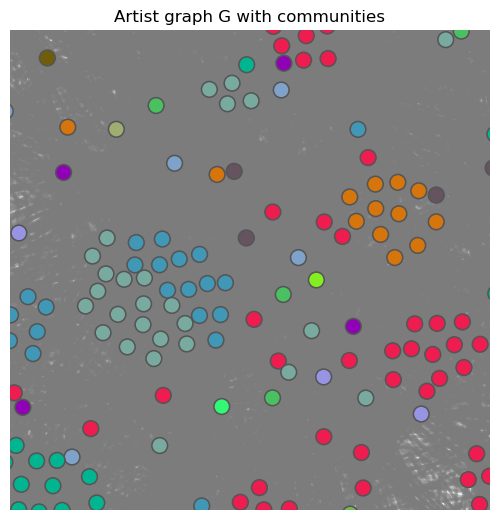

In [167]:
fig, ax = nw.draw_netwulf(communities_pos)
plt.title(f"Artist graph G with communities")
plt.show()

In [283]:
# Analyse the communitites based on stage, year or genre to see if there are any correlation

def analyse_communities(communities, attribute : str):
    community_nodes = {}
    for node, community_id in communities.items():
        if community_id not in community_nodes:
            community_nodes[community_id] = []
        community_nodes[community_id].append(node)

    for community_id, nodes in community_nodes.items():
        print(f"Community {community_id}:")
        for node in nodes:
            print(f"{node}:, {attribute}: {artists_graph.nodes[node][attribute]}")
    print()

# analyse_communities(communities_in_graph, "genre")

In [173]:
# Save community as file 

import pickle

with open("data/artist_communities_graph.pickle", "wb") as file:
    pickle.dump(artists_graph, file)

In [148]:
# Read dataset with artists and songs combined 

songs_artists_df = pd.read_csv("data/songs_and_artists_dataset.csv")
songs_artists_df


,Unnamed: 0.1,Unnamed: 0,id,name,artists,duration,explicit,popularity,artist_names,tents,years
0,0,0,0Q7w6RlWjVZiKitdlWM282,Stalemate,[{'external_urls': {'spotify': 'https://open.s...,277426,False,24,['IO Echo'],"[1577 Gobi Tent\nName: stage, dtype: object]","[1577 2013\nName: year, dtype: int64]"
1,1,1,5rLo0sFprpI2vwhGzEJgzq,Aokigahara Forest,[{'external_urls': {'spotify': 'https://open.s...,262203,False,22,['IO Echo'],"[1577 Gobi Tent\nName: stage, dtype: object]","[1577 2013\nName: year, dtype: int64]"
2,2,2,1sPtqZQFP2TNpAzmvdPX6g,Harm,[{'external_urls': {'spotify': 'https://open.s...,246495,False,20,['IO Echo'],"[1577 Gobi Tent\nName: stage, dtype: object]","[1577 2013\nName: year, dtype: int64]"
3,3,3,12ErSbh7ZMQ31AOQMMYVoF,Ecstasy Ghost,[{'external_urls': {'spotify': 'https://open.s...,182040,False,17,['IO Echo'],"[1577 Gobi Tent\nName: stage, dtype: object]","[1577 2013\nName: year, dtype: int64]"
4,4,4,4AYvorlOe53Hj6WGSIJgWQ,When the Lillies Die,[{'external_urls': {'spotify': 'https://open.s...,217053,False,14,['IO Echo'],"[1577 Gobi Tent\nName: stage, dtype: object]","[1577 2013\nName: year, dtype: int64]"
...,...,...,...,...,...,...,...,...,...,...,...
5692,5692,5692,57eOI4ftuKaQ9SbCKLG8df,Bugg'n,[{'external_urls': {'spotify': 'https://open.s...,205798,False,26,"['TNGHT', 'Hudson Mohawke', 'Lunice']","[1569 Gobi Tent\nName: stage, dtype: object...","[1569 2013\nName: year, dtype: int64, 2198 ..."
5693,5693,5693,1sUe9L5dUBHooUC8eWKPMU,Acrylics,[{'external_urls': {'spotify': 'https://open.s...,256775,False,26,['TNGHT'],"[1569 Gobi Tent\nName: stage, dtype: object]","[1569 2013\nName: year, dtype: int64]"
5694,5694,5694,2sHBqFK61DrQyz0S5PyTL8,First Body,[{'external_urls': {'spotify': 'https://open.s...,178586,False,23,"['TNGHT', 'Hudson Mohawke', 'Lunice']","[1569 Gobi Tent\nName: stage, dtype: object...","[1569 2013\nName: year, dtype: int64, 2198 ..."
5695,5695,5695,1xrFhQtVTb5agVOvS0Tv1g,Top Floor,[{'external_urls': {'spotify': 'https://open.s...,113569,False,21,"['TNGHT', 'Hudson Mohawke', 'Lunice']","[1569 Gobi Tent\nName: stage, dtype: object...","[1569 2013\nName: year, dtype: int64, 2198 ..."


In [149]:
# Find artist with the n songs highest popularity score, convert the string output to a list 

import ast 

n = 300 
top_popularity_artists = songs_artists_df.nlargest(n, 'popularity')['artist_names'].tolist()
artist_names = []
for item in top_popularity_artists:
    artist_names.extend(ast.literal_eval(item))

unqiue_top_artists = ((set(artist_names)))

# Make sure we only include Coachella artists
top_coachella_artists = unqiue_top_artists & set(artist_data["name"])

print(f"{len(top_coachella_artists)} artists found based on the {n} top songs.")

print("\nTop artists")
for a in (top_coachella_artists): 
    print(a)

98 artists found based on the 300 top songs.

Top artists
A$AP Ferg
Ms. Lauryn Hill
Mark Ronson
Drake
Metro Boomin
Bad Bunny
Sam Feldt
Flo Milli
Kali Uchis
Ariana Grande
Major Lazer
Still Woozy
Marshmello
Amy Winehouse
Masego
Thundercat
Lorde
Chase & Status
Pavement
Bomba Estéreo
The Weeknd
Anitta
boygenius
Mitski
AC/DC
Chris Stapleton
Lil Uzi Vert
The Cinematic Orchestra
SZA
Mariah the Scientist
FKJ
The Chainsmokers
Kim Petras
Playboi Carti
Foo Fighters
Doja Cat
Natanael Cano
Stromae
Future
J Balvin
Zedd
Corinne Bailey Rae
Ali Gatie
Milky Chance
Declan McKenna
Tom Odell
David Guetta
Mac DeMarco
Whethan
Mareux
Crystal Castles
Khalid
Eliza Doolittle
Ari Lennox
Joey Bada$$
Kid Cudi
Sasha Alex Sloan
Calvin Harris
Alec Benjamin
Disclosure
Eric Prydz
Oasis
Sia
Gucci Mane
Dennis Lloyd
Julian Casablancas
21 Savage
Peter Bjorn and John
Cardi B
Kanye West
UMI
Jimmy Eat World
The Neighbourhood
Frank Ocean
Baby Keem
The Shins
Cults
DJ Khaled
Fred again..
Travis Scott
Aphex Twin
Miguel
G-Eazy
Kend

In [150]:
f""" Is there a correlation between the popularity of the Coachella artist (based on popularity score), 
and how many times they have performed at Coachella? This is done by calculating how many of the {len(unqiue_top_artists)} that have performed more than {n_times}."""

correlation_list = list(set(dup_artists).intersection(top_coachella_artists))
print(f"{len(correlation_list)} of the top artists performed more than {n_times} times at Coachella.")

print("These artists are:")
for a in correlation_list:
    print(a)


12 of the top artists performed more than 2 times at Coachella.
These artists are:
Sia
Major Lazer
Ellie Goulding
Calvin Harris
The Weeknd
David Guetta
Mac DeMarco
Tame Impala
Zedd
Tiësto
Crystal Castles
Disclosure


### Find the top genres of each stage 

In [181]:
stages = set(artist_data["stage"].tolist())

print(f"There are {len(stages)} possible stages at Coachella")
for i, st in enumerate(stages):
    print(f"{i+1}: {st}")

# Find the combined popularity score of each tent 

There are 10 possible stages at Coachella
1: Insomniac Tent
2: Main Stage
3: Sahara Tent
4: Oasis Dome
5: Gobi Tent
6: Mojave Tent
7: Yuma Tent
8: Sonora Tent
9: Coachella Stage
10: Outdoor Theatre


In [280]:
from collections import Counter

# Find top genres for each stage, each year 

def top_n_genres(row : list, n : int):
    flattened_list = [item for sublist in row for item in sublist]
    element_counts = Counter(flattened_list)
    top_elem = [e for e, c in element_counts.most_common(n)]
    return top_elem

def find_top_genres(df, n):

    grouped_artist_data = df.groupby(["year", "stage"])["genres"].agg(list).reset_index()
    grouped_artist_data["top_genres"] = grouped_artist_data["genres"].apply(lambda row: top_n_genres(row, n))
    grouped_artist_data = grouped_artist_data.drop(columns=["genres"])
    return grouped_artist_data

n_genres = 3
top_genres_df = find_top_genres(artist_data, n_genres)



In [282]:
# Find top genres for each tent
top_genres_stage_df = top_genres_df.groupby(["stage"])["top_genres"].agg(list).reset_index()
top_genres_stage_df["top_genres"] = top_genres_stage_df["top_genres"].apply(lambda row: top_n_genres(row, n))
    
top_genres_stage_df

,stage,top_genres
0,Coachella Stage,"[alternative rock, rock, modern rock]"
1,Gobi Tent,"[indietronica, escape room, art pop]"
2,Insomniac Tent,"[big beat, breakbeat, electronica]"
3,Main Stage,"[alternative rock, alternative metal, nu metal]"
4,Mojave Tent,"[indie rock, indietronica, electronica]"
5,Oasis Dome,"[future garage, drum and bass, classic dubstep]"
6,Outdoor Theatre,"[indie rock, indietronica, alternative rock]"
7,Sahara Tent,"[edm, electro house, pop dance]"
8,Sonora Tent,"[indie garage rock, noise pop, art pop]"
9,Yuma Tent,"[minimal techno, microhouse, house]"


In [151]:

def create_song_graph(songs_artists_df : pd.DataFrame): 
    song_graph = nx.Graph()
    count = 0 
    for artist_names in songs_artists_df["artist_names"]:
        if len(artist_names) > 1:
            count += 1
            for artist1 in artist_names:
                for artist2 in artist_names:
                    if artist1 != artist2:
                        song_graph.add_edge(artist1, artist2)
    print(count)

    return song_graph 

# Find top words to use in each stage 